In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('output.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0


In [3]:
df = df.drop(columns=["day", "month", "year","Classes"])
# Show the cleaned dataset
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9


In [5]:
#Independent and dependent features
X = df.drop('FWI',axis =1)
y= df['FWI']

In [6]:
#Train test split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.25, random_state = 10)

In [7]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI
111,35,34,17,0.0,92.2,23.6,97.3,13.8,29.4
335,28,67,19,0.0,75.4,2.9,16.3,2.0,4.0
312,39,39,15,0.2,89.3,15.8,35.4,8.2,15.8
20,32,55,14,0.0,86.2,8.3,18.4,5.0,8.2
59,37,55,15,0.0,89.3,28.3,67.2,8.3,28.3


In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
X_train_scaled.shape

(273, 9)

🔥 Ridge Regression Best Model Metrics 🔥
Best alpha: 0.03907
Train R²: 0.9797 | Test R²: 0.9452
Train RMSE: 1.1301 | Test RMSE: 1.6042
Train MSE: 1.2772 | Test MSE: 2.5734
Train MAE: 0.6078 | Test MAE: 0.7295
Explained Variance Score: 0.9460


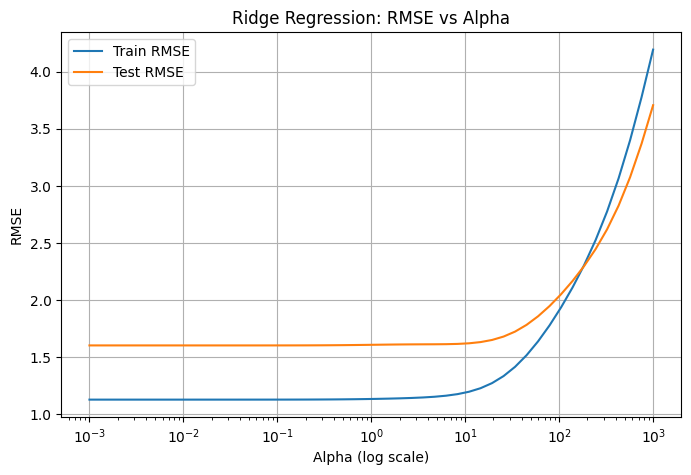

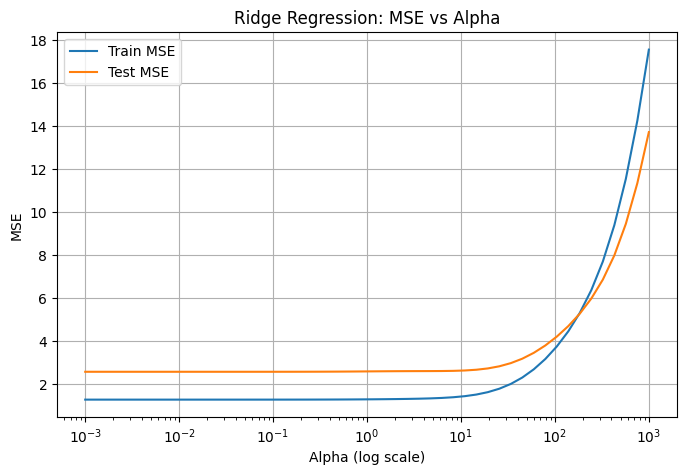

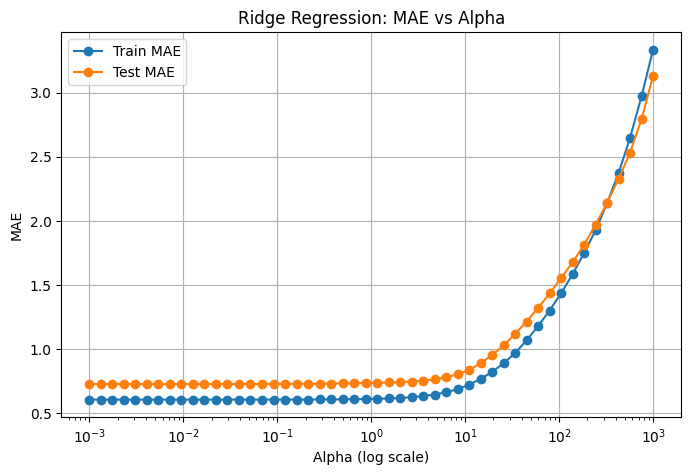

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error,
    explained_variance_score
)

# ---------------------------
# Range of alpha values
# ---------------------------
alphas = np.logspace(-3, 3, 50)

# Store metrics for visualization
train_rmse, test_rmse = [], []
train_mse, test_mse = [], []
train_mae, test_mae = [], []

# ---------------------------
# Train models across alphas
# ---------------------------
for a in alphas:
    ridge = Ridge(alpha=a, max_iter=5000)
    ridge.fit(X_train_scaled, y_train)
    
    # Predictions
    y_train_pred = ridge.predict(X_train_scaled)
    y_test_pred  = ridge.predict(X_test_scaled)
    
    # RMSE
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    
    # MSE
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    
    # MAE
    train_mae.append(mean_absolute_error(y_train, y_train_pred))
    test_mae.append(mean_absolute_error(y_test, y_test_pred))

# ---------------------------
# Pick best alpha (min test RMSE)
# ---------------------------
best_alpha_index = np.argmin(test_rmse)
best_alpha = alphas[best_alpha_index]

# Train final model with best alpha
ridge_best = Ridge(alpha=best_alpha, max_iter=5000)
ridge_best.fit(X_train_scaled, y_train)
y_train_pred = ridge_best.predict(X_train_scaled)
y_test_pred  = ridge_best.predict(X_test_scaled)

# ---------------------------
# Metrics for best alpha
# ---------------------------
train_r2 = r2_score(y_train, y_train_pred)
test_r2  = r2_score(y_test, y_test_pred)
train_rmse_final = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse_final  = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mse_final = mean_squared_error(y_train, y_train_pred)
test_mse_final  = mean_squared_error(y_test, y_test_pred)
train_mae_final = mean_absolute_error(y_train, y_train_pred)
test_mae_final  = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_evs  = explained_variance_score(y_test, y_test_pred)

# ---------------------------
# Print Results
# ---------------------------
print("🔥 Ridge Regression Best Model Metrics 🔥")
print(f"Best alpha: {best_alpha:.5f}")
print(f"Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse_final:.4f} | Test RMSE: {test_rmse_final:.4f}")
print(f"Train MSE: {train_mse_final:.4f} | Test MSE: {test_mse_final:.4f}")
print(f"Train MAE: {train_mae_final:.4f} | Test MAE: {test_mae_final:.4f}")
print(f"Explained Variance Score: {test_evs:.4f}")



# ---------------------------
# Visualizations
# ---------------------------

# 1️⃣ RMSE vs Alpha
plt.figure(figsize=(8,5))
plt.plot(alphas, train_rmse, label="Train RMSE")
plt.plot(alphas, test_rmse, label="Test RMSE")
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("RMSE")
plt.title("Ridge Regression: RMSE vs Alpha")
plt.legend()
plt.grid(True)
plt.show()

# 2️⃣ MSE vs Alpha
plt.figure(figsize=(8,5))
plt.plot(alphas, train_mse, label="Train MSE")
plt.plot(alphas, test_mse, label="Test MSE")
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("MSE")
plt.title("Ridge Regression: MSE vs Alpha")
plt.legend()
plt.grid(True)
plt.show()

# 3️⃣ MAE vs Alpha
plt.figure(figsize=(8,5))
plt.plot(alphas, train_mae, label="Train MAE", marker='o')
plt.plot(alphas, test_mae, label="Test MAE", marker='o')
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("MAE")
plt.title("Ridge Regression: MAE vs Alpha")
plt.legend()
plt.grid(True)
plt.show()


In [20]:
import pickle

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Scaler saved as scaler.pkl")


Scaler saved as scaler.pkl


In [22]:
import pickle

# Load model
with open("ridge_model.pkl", "rb") as f:
    model = pickle.load(f)

# Load scaler
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

print("Model and scaler loaded successfully!")


Model and scaler loaded successfully!


In [30]:
print("Model expects:", model.coef_.shape[0], "features")

Model expects: 9 features


In [31]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI
111,35,34,17,0.0,92.2,23.6,97.3,13.8,29.4
335,28,67,19,0.0,75.4,2.9,16.3,2.0,4.0
312,39,39,15,0.2,89.3,15.8,35.4,8.2,15.8
20,32,55,14,0.0,86.2,8.3,18.4,5.0,8.2
59,37,55,15,0.0,89.3,28.3,67.2,8.3,28.3


In [29]:
df_scaled = scaler.transform(X_train)
preds = model.predict(df_scaled)
print("Predictions:", preds)

Predictions: [ 2.05751847e+01  5.45422626e-01  1.03863226e+01  4.81071859e+00
  1.38082385e+01  1.01696267e+01  3.11167443e+00  1.41747342e+01
 -1.72684091e-01  8.35310510e+00  1.51243906e+01  8.49626422e-01
  1.32656923e+00  7.61907018e+00  1.64840892e+01 -5.50920118e-01
  3.59850333e+00  1.30533289e+00  1.02788043e+01  1.10063715e+01
  3.17866369e+00  5.09395203e+00  1.74640962e+01  1.55909446e+01
  1.79186085e+01  7.29697205e-02  1.43197401e+00  1.74640962e+01
  3.44884202e+00  1.72702540e+01  1.46897060e+01  1.34158924e+01
  5.31507238e-01  6.97149340e+00  6.21806503e+00  9.67987738e+00
  8.71217192e+00 -1.93691033e-01  1.46897060e+01  2.83963868e+00
  9.73079517e+00  1.49247707e+01  5.58398798e+00  2.20945454e+00
  3.56636928e-01  1.43197401e+00  4.92449035e+00  1.94556336e+01
  7.06659310e+00  2.91723276e+01  1.76820333e+01  1.25135679e+01
  1.40274112e+01  4.66256380e-01  5.66782734e+00  6.77912720e+00
  3.05120400e+00  6.21806503e+00 -6.28555264e-01  2.13996353e+01
  2.89228994